## Birth Control Drugs Review

The objective of this Notebook is to predict the sentiment, topic and side effects of the birth control drug Users, according to their reviews and various other features like the condition they are suffering from, the rating of the drug used, Date of the usage, and others.

#### Steps Performed
- DESCRIPTIVE STATISTICS
- DATA VISUALIZATION
- DATA PREPROCESSING
- LARGE LANGUAGE MODEL BUILDING
- FEATURE ENGINEERING
- LIGHT GBM MODEL BUILDING
- TOPIC MODELLING: LATENT DIRICHLET ALLOCATION (LDA)
- BERTopic MODEL
- SIDE EFFECT IDENTIFICATION

#### About Dataset
- The Drug Review Dataset is taken from the UCI Machine Learning Repository. This Dataset provides patient reviews on specific drugs along with related conditions and a 10-star patient rating reflecting the overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. The Drug Review Data Set is of shape (161297, 7) i.e. It has 7 features including the review and 161297 Data Points or entries.
- The features are <b>drugName</b> which is the name of the drug, <b>condition</b> which is the condition the patient is suffering from, <b>review</b> is the patients review, <b>rating</b> is the 10-star patient rating for the drug, <b>date</b> is the date of the entry and the <b>usefulcount</b> is the number of users who found the review useful.
- Here the sentiment of the review is the target variable that needs to be predicted. here we can notice that the sentiment of any review is not given, so we have to give the sentiment to the rating first and then use it as the target variable.
- We would also have to completely remove every drug that doesn't relate to a 'Birth Control' condition.

#### Lets get started with importing libraries

In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install wordcloud

%pip install scikit-learn
%pip install scikit_llm==0.2.0

%pip install nltk==3.8.1
%pip install lightgbm

%pip install bertopic

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('archive/drugsComTest_raw.csv')
test = pd.read_csv('archive/drugsComTrain_raw.csv')
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [5]:
# both the dataset contains same columns we can combine them for better analysis

data = pd.concat([train, test])
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [6]:
# Remove all drugs that don't treat the "Birth Control" condition
data = data[data["condition"] == 'Birth Control'] 

#### 1. Descriptive Statistics

In [7]:
# taking out information from the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38436 entries, 4 to 161291
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uniqueID     38436 non-null  int64 
 1   drugName     38436 non-null  object
 2   condition    38436 non-null  object
 3   review       38436 non-null  object
 4   rating       38436 non-null  int64 
 5   date         38436 non-null  object
 6   usefulCount  38436 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.3+ MB


In [8]:
# describing the data

data.describe()

,uniqueID,rating,usefulCount
count,38436.000000,38436.000000,38436.000000
mean,110545.243782,6.077974,7.848944
std,64244.711163,3.309582,17.682386
min,4.000000,1.000000,0.000000
25%,59993.750000,3.000000,2.000000
50%,107860.500000,7.000000,5.000000
75%,148912.250000,9.000000,9.000000
max,232200.000000,10.000000,1247.000000


In [9]:
# get the datatype of columns

data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [10]:
# checking if the data contains any NULL values

data.isnull().any()

uniqueID       False
drugName       False
condition      False
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [11]:
# How many drugs do we have?

num = len(data['drugName'].unique().tolist())
print('The number of Drugs are -',num )

The number of Drugs are - 181


In [12]:
# What are the most popular drugs?
# Top 10 Drugs (Most Popular)
data['drugName'].value_counts().nlargest(10)

Etonogestrel                          4394
Ethinyl estradiol / norethindrone     3081
Levonorgestrel                        2884
Nexplanon                             2883
Ethinyl estradiol / levonorgestrel    2107
Ethinyl estradiol / norgestimate      2097
Implanon                              1496
Mirena                                1320
Skyla                                 1074
Lo Loestrin Fe                         896
Name: drugName, dtype: int64

#### 2. Data Visualization

Lets see what the most popular birth control drugs look like 

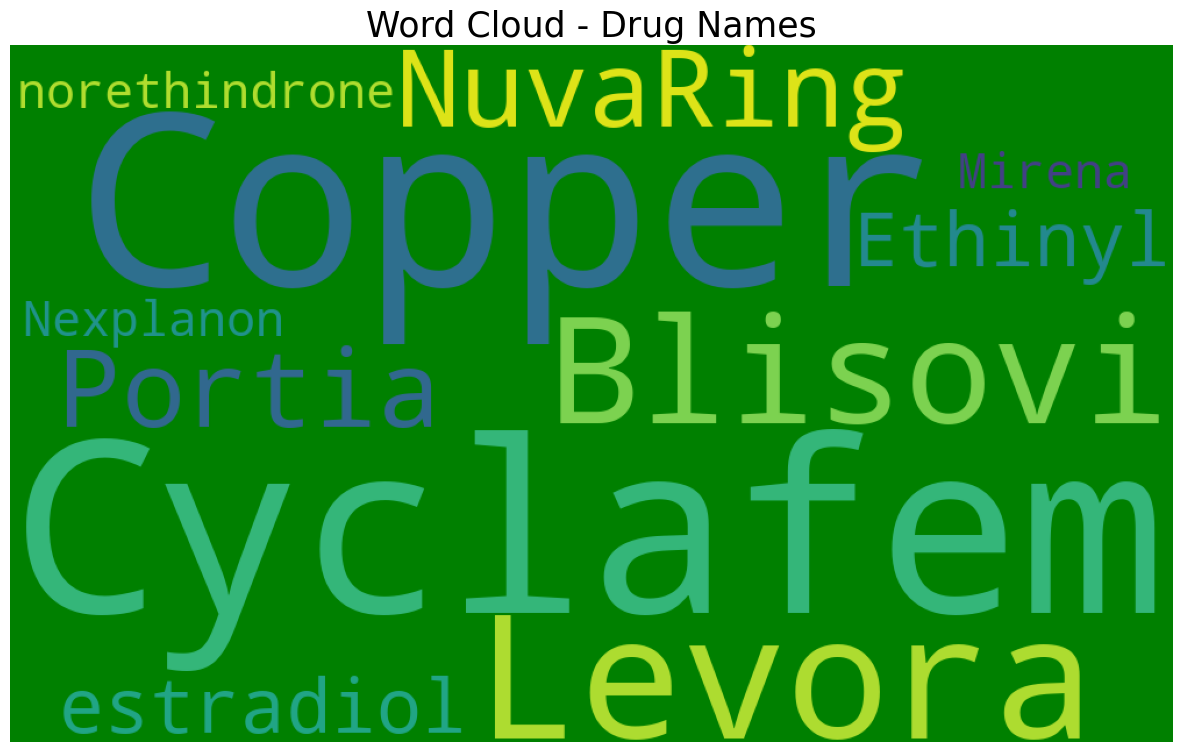

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopwords = list(STOPWORDS) + ["Junel", "Name", "object", "Fe", "dtype", "Length", "drugName"]

wordcloud = WordCloud(background_color = 'green', stopwords = stopwords, width = 1000, height = 600).generate(str(data['drugName']))

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('Word Cloud - Drug Names', fontsize = 25)
print(wordcloud)
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

Next, a barplot that shows the top 10 drugs with 10/10 rating

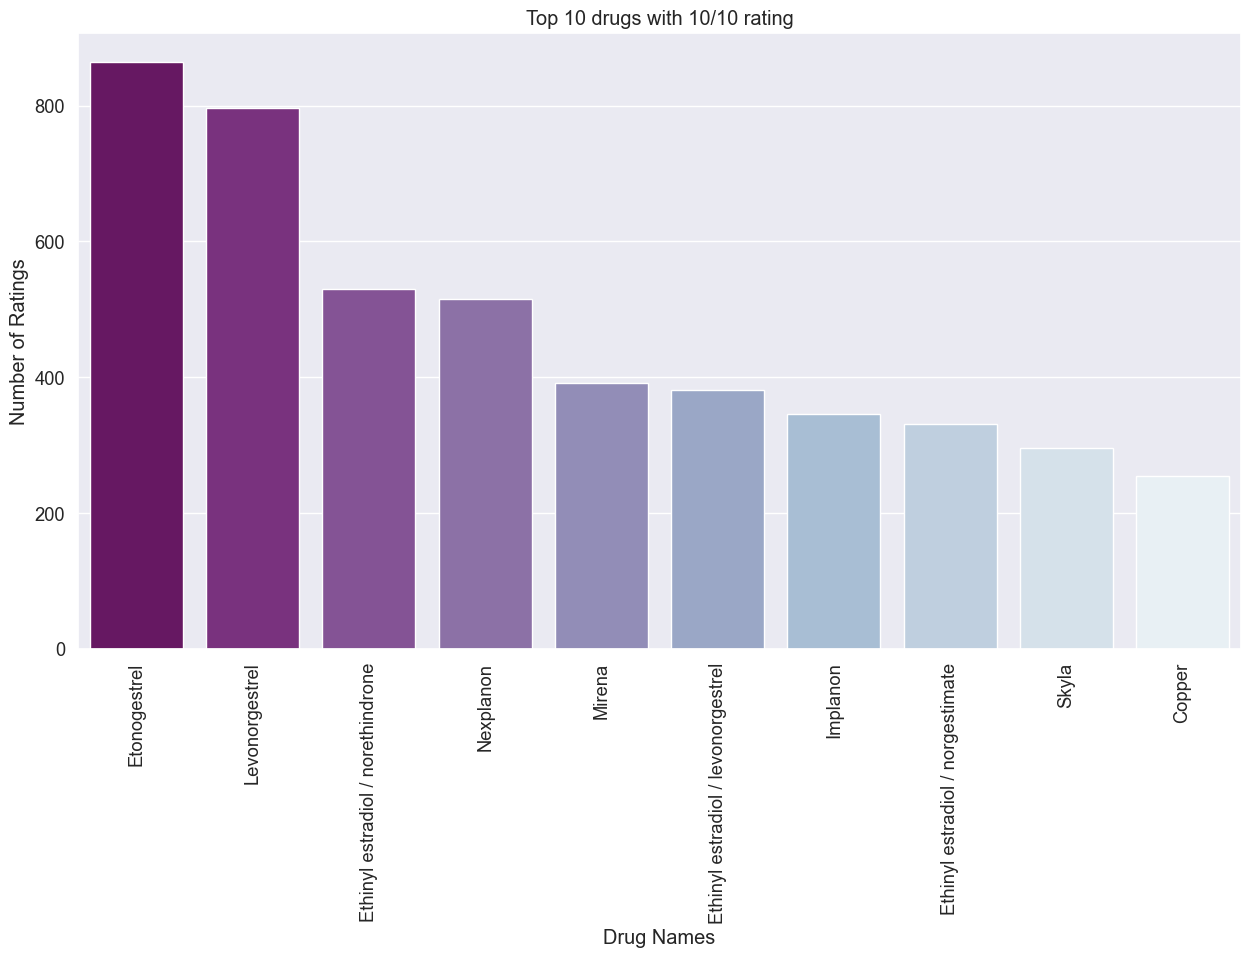

In [14]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'BuPu_r')

sns_rating.set_title('Top 10 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Next, This barplot shows the Top 10 drugs with the 1/10 rating

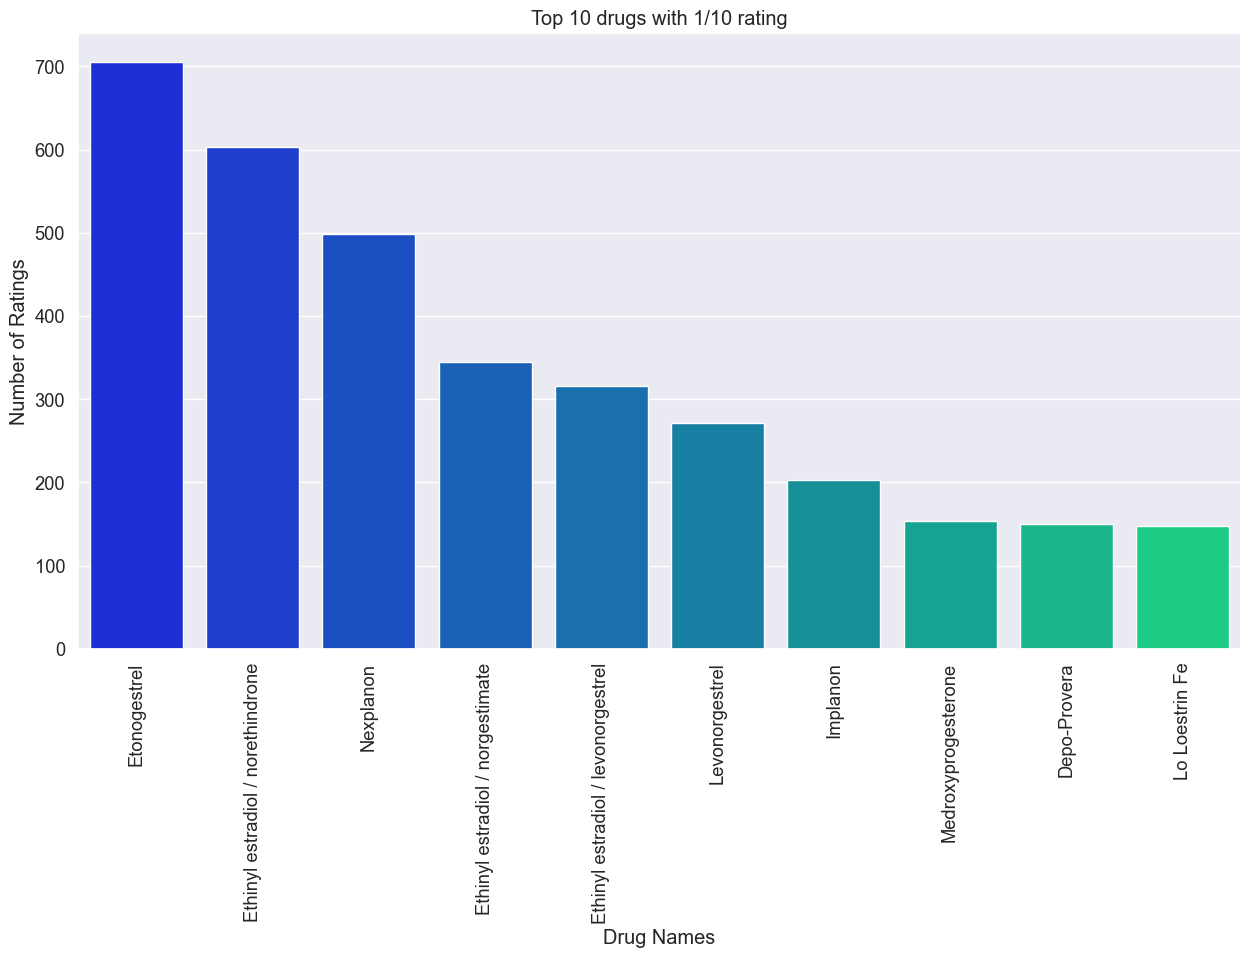

In [15]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10], palette = 'winter')

sns_rating.set_title('Top 10 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Then, a histogram would perfectly represent ratings by size

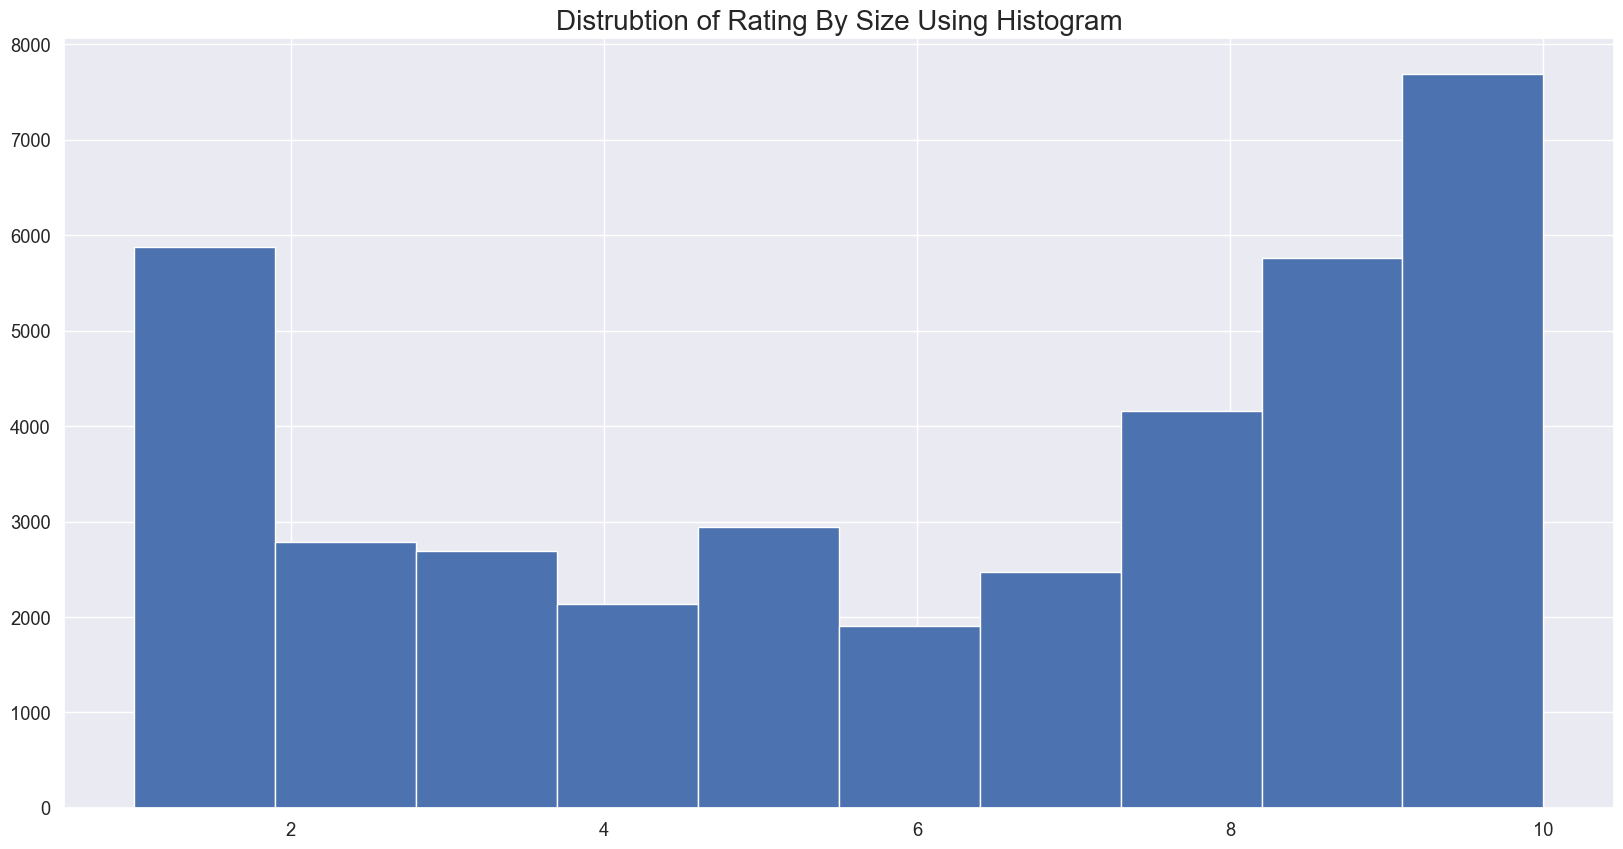

In [16]:
plt.figure(figsize=(20,10))
data['rating'].hist()
plt.title("Distrubtion of Rating By Size Using Histogram", fontsize=20)
plt.show()

We observe that a lot of people rated at the extremes i.e (1 and 9,10)

#### 2.1. More Visulaization

Lets take a loot at the dates

In [17]:
df = data.copy()
# converting the date into datetime format
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

# extracting year from date
df['Year'] = df['date'].dt.year

# extracting the month from the date
df['month'] = df['date'].dt.month

# extracting the days from the date
df['day'] = df['date'].dt.day

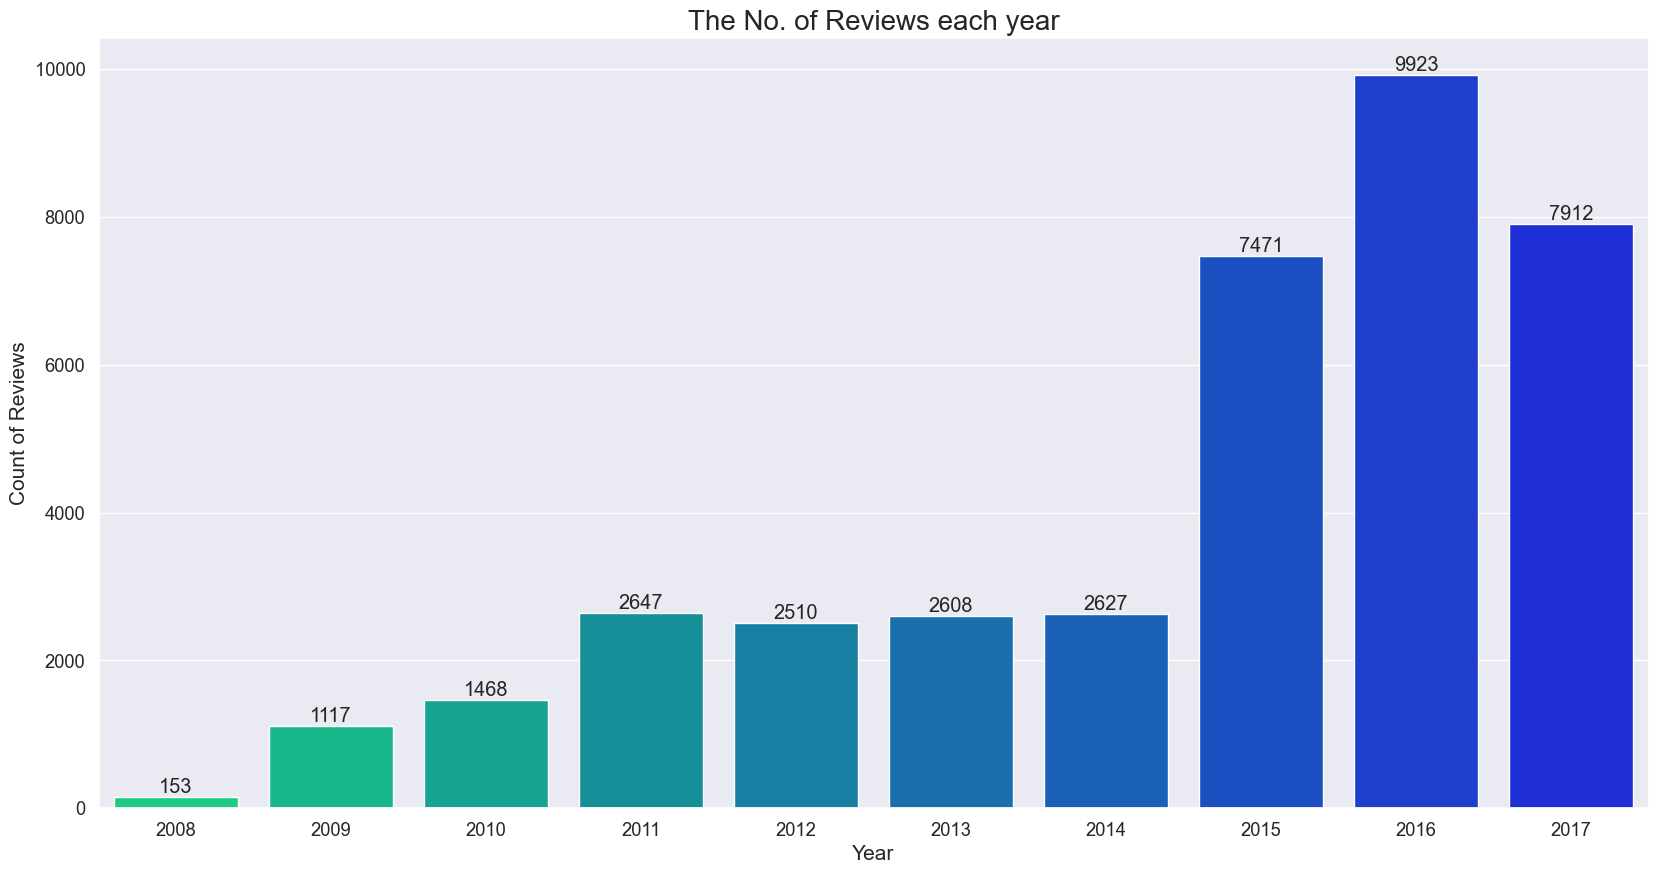

In [18]:
plt.figure(figsize=(20,10))
sns_=sns.countplot(x = 'Year', data = df, palette ='winter_r')

for i in sns_.containers:
    sns_.bar_label(i,)
    
plt.title('The No. of Reviews each year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count of Reviews', fontsize = 15)
plt.show()

In [19]:
# feature engineering step
# let's make a new column review sentiment 

# Define the conditions and corresponding choices for the sentiment categories
conditions = [
    (data['rating'] >= 7), # positive
    (data['rating'] >= 4) & (data['rating'] <= 6), # neutral
    (data['rating'] >= 1) & (data['rating'] <= 3) # negative
]
choices = ['Positive', 'Neutral', 'Negative']

# Create a new column 'Sentiment' based on the conditions and choices
data['Review_Sentiment'] = np.select(conditions, choices, default='Unknown')

data['Review_Sentiment'].value_counts()

Positive    20085
Negative    11358
Neutral      6993
Name: Review_Sentiment, dtype: int64

A pie chart to represent the sentiments of the patients

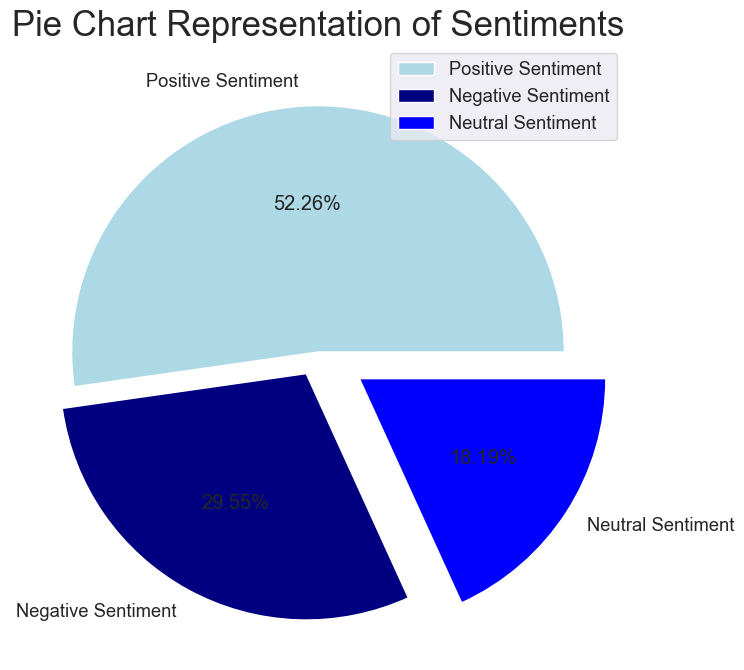

In [20]:
size = [20085, 11358, 6993]
colors = ['lightblue', 'navy', 'blue']
labels = "Positive Sentiment","Negative Sentiment","Neutral Sentiment"
explode = [0, 0.1, 0.2]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

#### 3. Data Preprocessing

In [21]:
def review_clean(review):
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of '&#039;' which is meant to be an apostrophe
    pattern_remove = lower.str.replace("&#039;", "'")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')

    # removing double quotesfrom string
    dataframe_new = dataframe.str.strip('\"')
    
    return dataframe_new

In [22]:
data['review_clean'] = review_clean(data['review'])

/var/folders/1y/tjpkyylj5rn_6r17jrmpj5k00000gn/T/ipykernel_1927/2428942140.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
/var/folders/1y/tjpkyylj5rn_6r17jrmpj5k00000gn/T/ipykernel_1927/2428942140.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
/var/folders/1y/tjpkyylj5rn_6r17jrmpj5k00000gn/T/ipykernel_1927/2428942140.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
/var/folders/1y/tjpkyylj5rn_6r17jrmpj5k00000gn/T/ipykernel_1927/2428942140.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
/var/folders/1y/tjpkyylj5rn_6r17jrmpj5k000

In [23]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'], errors = 'coerce')

# now extracting year from date
data['Year'] = data['date'].dt.year

# extracting the month from the date
data['month'] = data['date'].dt.month

# extracting the days from the date
data['day'] = data['date'].dt.day

In [24]:
data.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean,Year,month,day
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,Positive,i have been on this birth control for one cycl...,2015,10,22
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,2016-06-06,1,Neutral,i ve had the copper coil for about 3 months no...,2016,6,6
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,2011-04-16,3,Negative,i was on this pill for almost two years it doe...,2011,4,16
30,79865,Blisovi Fe 1 / 20,Birth Control,"""I absolutely love this product and recommend ...",10,2017-11-03,4,Positive,i absolutely love this product and recommend t...,2017,11,3
37,60341,NuvaRing,Birth Control,"""I was on this for 5 years (and birth control ...",7,2011-06-17,0,Positive,i was on this for 5 years and birth control pi...,2011,6,17


#### 4. Large Language Model Building

https://towardsdatascience.com/scikit-llm-power-up-your-text-analysis-in-python-using-llm-models-within-scikit-learn-framework-e9f101ffb6d4

In [25]:
from skllm.config import SKLLMConfig

with open('key.txt') as keys: # Your Open API Key
    keys = keys.readlines(0)
    secret = keys[0].replace('\n','')
    org = keys[1]

OPENAI_SECRET_KEY = secret
OPENAI_ORG_ID = org

SKLLMConfig.set_openai_key(OPENAI_SECRET_KEY)
SKLLMConfig.set_openai_org(OPENAI_ORG_ID)

In [26]:
%pip show scikit_llm

Name: scikit-llm
Version: 0.2.0
Summary: Scikit-LLM: Seamlessly integrate powerful language models like ChatGPT into scikit-learn for enhanced text analysis tasks.
Home-page: 
Author: 
Author-email: Oleg Kostromin <kostromin97@gmail.com>, Iryna Kondrashchenko <iryna230520@gmail.com>
License: MIT
Location: /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages
Requires: annoy, openai, pandas, scikit-learn, tqdm
Required-by: 
Note: you may need to restart the kernel to use updated packages.


Using Single Zero shot GPT classifier, Let’s do a sentiment analysis of our reviews. For training purposes, we use the sentiment for each review. We train the model with these reviews and sentiment, so that we can predict new reviews using the trained model.

In [27]:
# Lets split our data into train and testing
from sklearn.model_selection import train_test_split

X_train_llm, X_test_llm, y_train_llm, y_test_llm = train_test_split(data['review_clean'], data['Review_Sentiment'],
                                                                    test_size = 0.3,
                                                                    random_state = 42)

In [28]:
X_train_llm = X_train_llm.to_list()
X_test_llm = X_test_llm.to_list()
y_train_llm = y_train_llm.to_list()
y_test_llm = y_test_llm.to_list()

In [29]:
from skllm import ZeroShotGPTClassifier

# Initialize the classifier with the OpenAI model
clf = ZeroShotGPTClassifier(openai_model="gpt-3.5-turbo")

# Train the model 
clf.fit(X=X_train_llm, y=y_train_llm)  

# Use the trained classifier to predict the sentiment of the new reviews
predictions = clf.predict(X=X_test_llm[5:12])

 14%|█▍        | 1/7 [00:13<01:22, 13.73s/it]

Could not obtain the completion after 3 retries: `RateLimitError :: You exceeded your current quota, please check your plan and billing details.`
None
Could not extract the label from the completion: 'NoneType' object is not subscriptable


 29%|██▊       | 2/7 [00:26<01:04, 12.88s/it]

Could not obtain the completion after 3 retries: `RateLimitError :: You exceeded your current quota, please check your plan and billing details.`
None
Could not extract the label from the completion: 'NoneType' object is not subscriptable


 43%|████▎     | 3/7 [00:36<00:47, 11.93s/it]

Could not obtain the completion after 3 retries: `RateLimitError :: You exceeded your current quota, please check your plan and billing details.`
None
Could not extract the label from the completion: 'NoneType' object is not subscriptable


 57%|█████▋    | 4/7 [00:47<00:34, 11.57s/it]

Could not obtain the completion after 3 retries: `RateLimitError :: You exceeded your current quota, please check your plan and billing details.`
None
Could not extract the label from the completion: 'NoneType' object is not subscriptable


 71%|███████▏  | 5/7 [01:00<00:23, 11.94s/it]

Could not obtain the completion after 3 retries: `RateLimitError :: You exceeded your current quota, please check your plan and billing details.`
None
Could not extract the label from the completion: 'NoneType' object is not subscriptable


 86%|████████▌ | 6/7 [01:11<00:11, 11.64s/it]

Could not obtain the completion after 3 retries: `RateLimitError :: You exceeded your current quota, please check your plan and billing details.`
None
Could not extract the label from the completion: 'NoneType' object is not subscriptable


100%|██████████| 7/7 [01:21<00:00, 11.70s/it]

Could not obtain the completion after 3 retries: `RateLimitError :: You exceeded your current quota, please check your plan and billing details.`
None
Could not extract the label from the completion: 'NoneType' object is not subscriptable


In [30]:
import pickle

In [31]:
pickle.dump(clf, open("weights/sentiment_classifier.pkl", 'wb'))

In [27]:
clf_new = pickle.load(open("weights/sentiment_classifier.pkl", 'rb'))
# Use the trained classifier to predict the sentiment of the new reviews
predictions = clf_new.predict(X=X_test_llm[5:12])

 57%|█████▋    | 4/7 [00:18<00:18,  6.10s/it]

Could not obtain the completion after 3 retries: `RateLimitError :: Rate limit reached for default-gpt-3.5-turbo in organization org-SKO9RkgxYO7Z8LwLr4RJVWU5 on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.`
None
Could not extract the label from the completion: 'NoneType' object is not subscriptable


 86%|████████▌ | 6/7 [00:36<00:08,  8.17s/it]

Could not obtain the completion after 3 retries: `RateLimitError :: Rate limit reached for default-gpt-3.5-turbo in organization org-SKO9RkgxYO7Z8LwLr4RJVWU5 on requests per min. Limit: 3 / min. Please try again in 20s. Contact us through our help center at help.openai.com if you continue to have issues. Please add a payment method to your account to increase your rate limit. Visit https://platform.openai.com/account/billing to add a payment method.`
None
Could not extract the label from the completion: 'NoneType' object is not subscriptable


100%|██████████| 7/7 [00:44<00:00,  6.30s/it]


In [32]:
for review, sentiment in zip(X_test_llm[5:12], predictions):
    print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

print(y_test_llm[5:12])

Review: my gyno recommended this pill to help with my pms symptoms and migraines i took it for 6 months and i had no migraines episodes after i started it didn t have my periods not even spotted and therefore no pms symptoms it was 100 effective for that reason but on the other hand i ve gained 20 lbs that no matter what i did i couldn t lose them i quit the pill 30 days ago it took one month for me to get my first period after starting in this pill and in 30 days i ve already lost 10 lbs the weight gain is the only reason why my rating was so low no woman would like to be treated for one symptom and get as a gift the side effect of gaining weight
Predicted Sentiment: Negative

Review: i switched to trinessa 28 s last week of april and i am very content after the birth of my child in december i tried the shot and it was the worst ever i lost tons of hair and constantly bled almost the whole 3 months mood swings and the list goes on well first week of trinessa i did get some headaches a

#### 5. Feature Engineering

In [33]:
# Text preprocessiong
import nltk
wn = nltk.WordNetLemmatizer()

import warnings; warnings.simplefilter('ignore')
import string

https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#:~:text=Stemming%20is%20a%20process%20that,form%2C%20which%20is%20called%20Lemma.

In [34]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')
data['review_without_stopwords'] = data['review_clean'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))

# Lemmatization
data['review_lemmatized'] = data['review_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))

In [35]:
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean,Year,month,day,review_without_stopwords,review_lemmatized
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,Positive,i have been on this birth control for one cycl...,2015,10,22,birth control one cycle reading reviews type s...,birth control one cycle reading review type si...
6,215892,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,2016-06-06,1,Neutral,i ve had the copper coil for about 3 months no...,2016,6,6,copper coil 3 months really excited thought ta...,copper coil 3 month really excited thought tak...
9,71428,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,2011-04-16,3,Negative,i was on this pill for almost two years it doe...,2011,4,16,pill almost two years work far getting pregnan...,pill almost two year work far getting pregnant...


In [36]:
data = data.dropna(how="any", axis=0)


In [37]:
"""New Features""" 

#Word count in each review
data['count_word']=data["review_lemmatized"].apply(lambda x: len(str(x).split()))

#Unique word count 
data['count_unique_word']=data["review_lemmatized"].apply(lambda x: len(set(str(x).split())))

#Letter count
data['count_letters']=data["review_lemmatized"].apply(lambda x: len(str(x)))

#punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
data["count_words_upper"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["count_words_title"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["count_stopwords"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))

#Average length of the words
data["mean_word_len"] = data["review_lemmatized"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

The new features engineered are 'count_word' which is the number of words in each review, 'count_unique_word' which is the number of the unique words in the reviews. 'count_letters' is the letter count, 'punctuation_count' is the punctuation count, 'count_words_upper' is the upper case word count,'count_words_title' is the title case word counts, 'count_stopwords' is the number of stop words in the review, and the 'mean_word_len' is the average length of the words in the review. The date is also divided into three columns which are day, month and year for separate features for training.

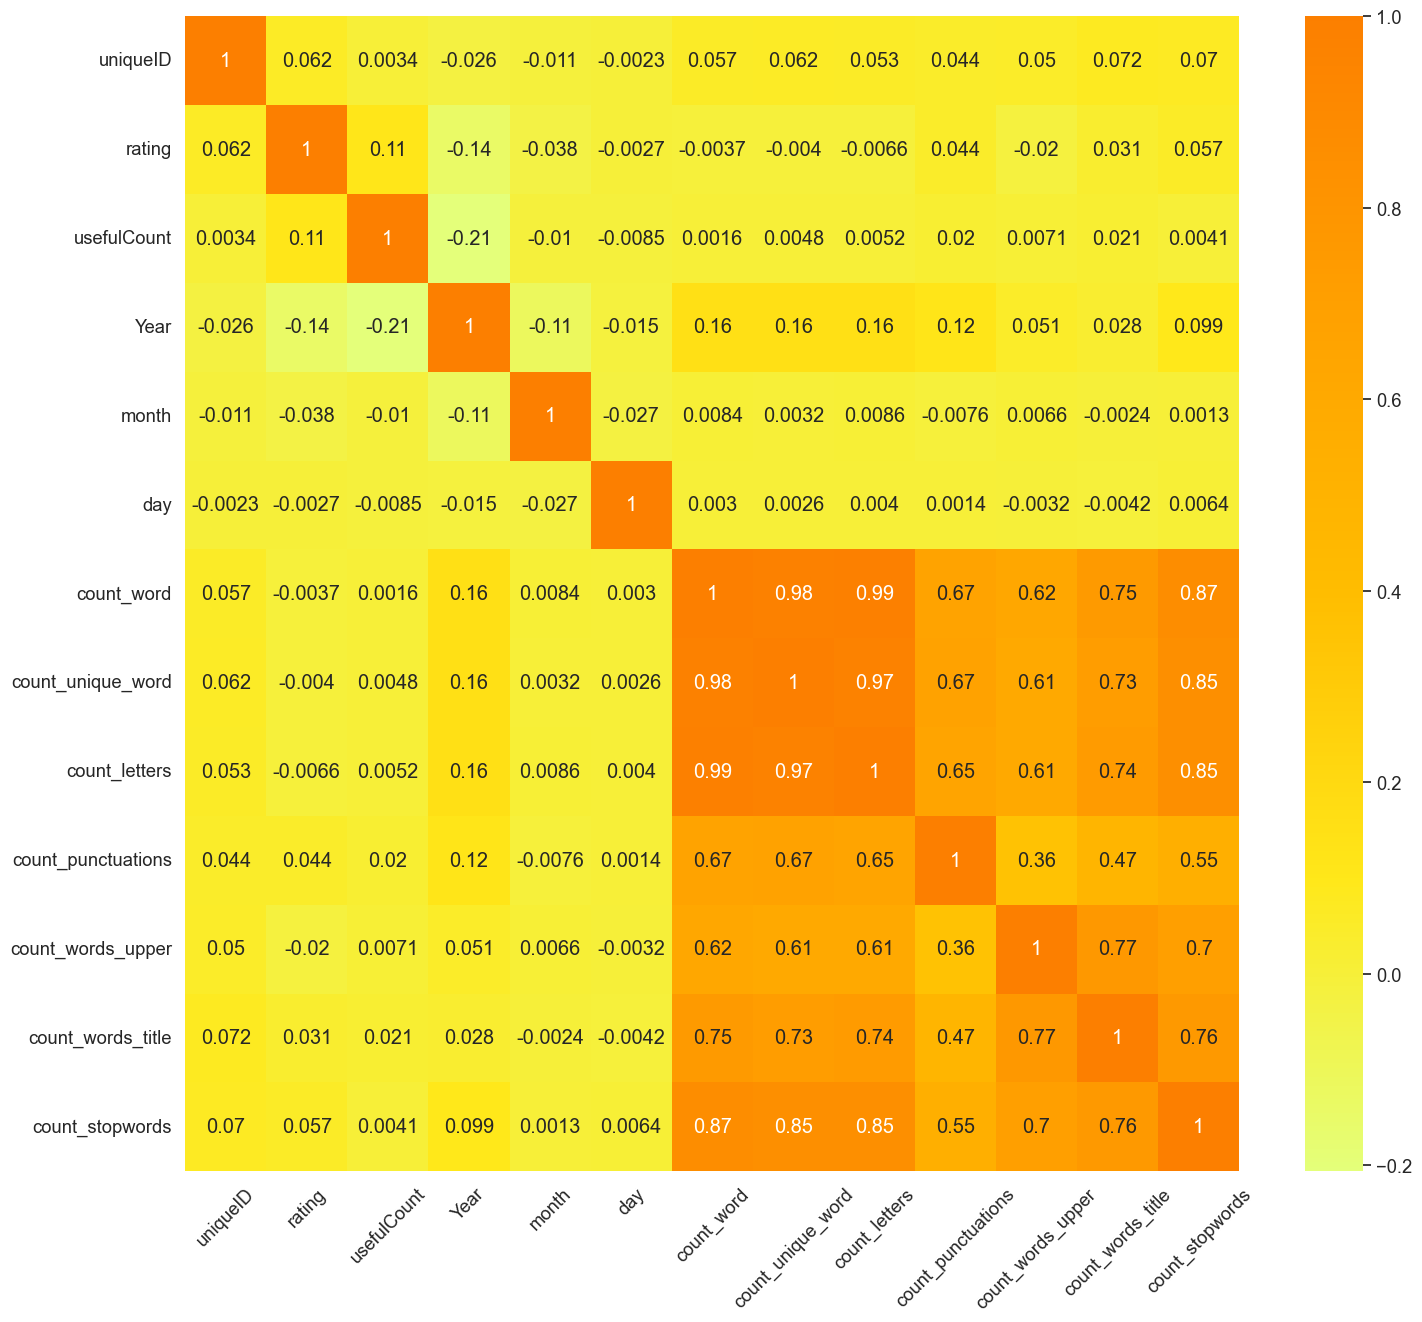

In [38]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = ['int64','int32']).corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [39]:
# Label Encoding Drugname

from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'Review_Sentiment']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])

The Label Encoder is used to change the categorical values of Drug Names in to numerical values for the machine learning modelling. There are 181 unique drugs in the dataset that's why One hot encoder is not used as it would generate 151 new features and it would be very computationally expensive.

#### 6. Light GBM Model Building (Optional)

LightGBM is a gradient boosting framework that uses treebased learning algorithms. It's designed to be distributed and efficient. It has many advantages like faster training speed and higher efficiency, lower memory usage, better accuracy and support of parallel and GPU learning, since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit.

https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/

https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python

In [40]:
# Importing Libraries for the Machine Learning Model
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [41]:
data.head(3)

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean,Year,...,review_without_stopwords,review_lemmatized,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len
4,97768,24,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,2,i have been on this birth control for one cycl...,2015,...,birth control one cycle reading reviews type s...,birth control one cycle reading review type si...,66,55,417,17,10,17,80,5.333333
6,215892,22,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,2016-06-06,1,1,i ve had the copper coil for about 3 months no...,2016,...,copper coil 3 months really excited thought ta...,copper coil 3 month really excited thought tak...,51,41,325,34,3,4,45,5.392157
9,71428,82,Birth Control,"""I was on this pill for almost two years. It d...",2,2011-04-16,3,0,i was on this pill for almost two years it doe...,2011,...,pill almost two years work far getting pregnan...,pill almost two year work far getting pregnant...,44,44,272,13,5,9,46,5.204545


In [42]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review_Sentiment', 'review_clean', 'Year', 'month',
       'day', 'review_without_stopwords', 'review_lemmatized', 'count_word',
       'count_unique_word', 'count_letters', 'count_punctuations',
       'count_words_upper', 'count_words_title', 'count_stopwords',
       'mean_word_len'],
      dtype='object')

In [43]:
# Defining Features and splitting the data as train and test set

features = data[['usefulCount', 'day', 'month', 'Year','drugName',
                    'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = data['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (26905, 13)
The Test set size  (11531, 13)


70% of the dataset is used for the training and the rest of the data i.e. 30% is used for the testing purpose. The shape of the training set is (26905, 13) and the shape of the test set is (11531, 13).

In [44]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.3,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))

The Accuracy of the model is :  0.8227387043621542


In [58]:
print ("The confusion Matrix is ")
cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

The confusion Matrix is 
Confusion matrix

 [[2650   84  684]
 [ 209 1406  485]
 [ 415  167 5431]]

True Positives(TP) =  2650

True Negatives(TN) =  1406

False Positives(FP) =  84

False Negatives(FN) =  209


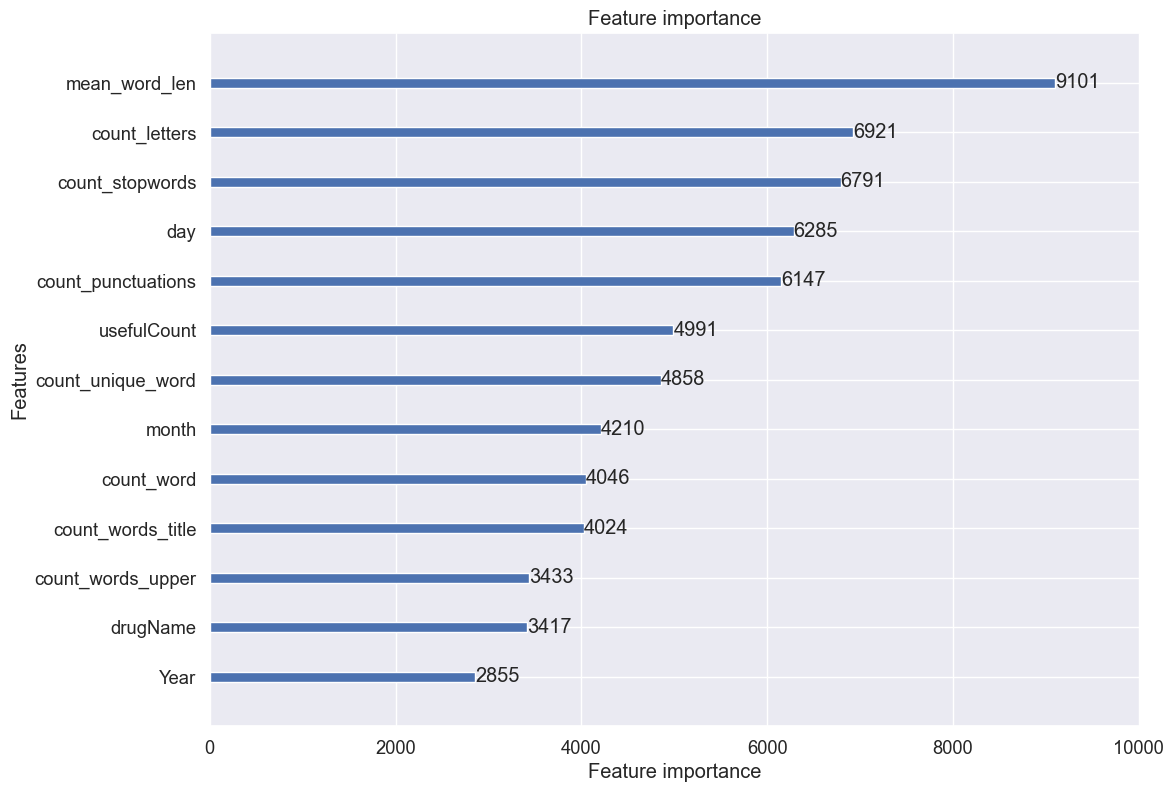

In [59]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'darkgrid', font_scale = 1.2)
plot_importance(model);

Above figure depicts the feature importance plot using the LightGBM. It can be inferred that the most importance feature is the mean word length and after that the condition of the patient. The least important feature of them all is the upper-case word count.

#### 7. Topic Modelling: Latent Dirichlet Allocation (LDA)

Latent Dirichlet Allocation (LDA) is a probabilistic generative model used for topic modeling. It assumes that each document in a corpus is a mixture of several topics, and each topic is a probability distribution over words. The underlying assumption is that documents are probabilistically generated based on this topic-word distribution. Here is a detailed overview of how LDA works:

- The corpus of text is first tokenized into words.
- A Dirichlet distribution is created over the topics.
- For each document, a topic distribution is sampled from the Dirichlet distribution.
- For each word in the document, a word is sampled from the topic distribution.
- This process is repeated for all documents in the corpus.

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

https://www.youtube.com/watch?v=T05t-SqKArY&pp=ygUibGF0ZW50IGRpcmljaGxldCBhbGxvY2F0aW9uIHB5dGhvbg%3D%3D

Let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [60]:
import gensim
from gensim.utils import simple_preprocess

from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['get', 'got', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data_lda = data['review_clean'].values.tolist()
data_words = list(sent_to_words(data_lda))
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['birth', 'control', 'one', 'cycle', 'reading', 'reviews', 'type', 'similar', 'birth', 'controls', 'bit', 'apprehensive', 'start', 'im', 'giving', 'birth', 'control', 'long', 'enough', 'far', 'love', 'birth', 'control', 'side', 'effects', 'minimal', 'like', 'im', 'even', 'birth']


In [61]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 5), (3, 1), (4, 1), (5, 4), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


How Many Topics?

<Axes: xlabel='number_of_topics', ylabel='coherence_score'>

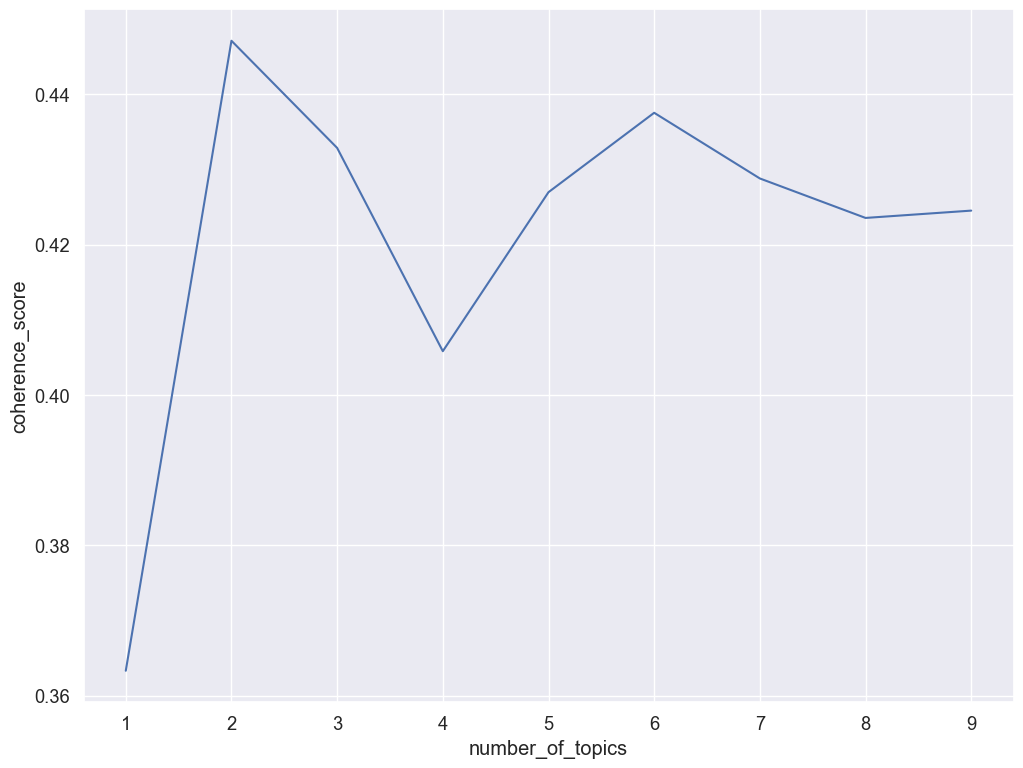

In [62]:
from gensim.models import CoherenceModel

# Compute coherence score
number_of_topics = []
coherence_score = []
for i in range(1,10):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            iterations=50,
                                            num_topics=i)
    coherence_model_lda = CoherenceModel(model=lda_model, 
                                        texts=texts, 
                                        dictionary=id2word, 
                                        coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    number_of_topics.append(i)
    coherence_score.append(coherence_lda)

# Create a dataframe of coherence score by number of topics 
topic_coherence = pd.DataFrame({'number_of_topics':number_of_topics,
                                'coherence_score':coherence_score})

# Print a line plot
sns.lineplot(data=topic_coherence, x='number_of_topics', y='coherence_score')

Model Training

In [63]:
from pprint import pprint

# number of topics
num_topics = 3
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"pill" + 0.011*"period" + 0.010*"would" + 0.009*"first" + '
  '0.009*"months" + 0.009*"birth" + 0.009*"control" + 0.008*"like" + '
  '0.008*"pain" + 0.008*"years"'),
 (1,
  '0.015*"pill" + 0.015*"months" + 0.014*"period" + 0.012*"side" + '
  '0.011*"birth" + 0.011*"first" + 0.011*"control" + 0.011*"month" + '
  '0.010*"effects" + 0.010*"acne"'),
 (2,
  '0.018*"period" + 0.013*"months" + 0.012*"control" + 0.012*"birth" + '
  '0.011*"weight" + 0.010*"days" + 0.009*"pill" + 0.009*"first" + '
  '0.009*"periods" + 0.008*"like"')]


In [64]:
import pyLDAvis.gensim
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.025869 -0.005861       1        1  37.867217
0      0.020223 -0.012671       2        1  32.547983
2      0.005646  0.018532       3        1  29.584801, topic_info=        Term          Freq         Total Category  logprob  loglift
183     acne  10275.000000  10275.000000  Default  30.0000  30.0000
45      side  12179.000000  12179.000000  Default  29.0000  29.0000
72      pain   7639.000000   7639.000000  Default  28.0000  28.0000
11   effects   9994.000000   9994.000000  Default  27.0000  27.0000
396  implant   3324.000000   3324.000000  Default  26.0000  26.0000
..       ...           ...           ...      ...      ...      ...
108     pill   4590.632975  21273.444695   Topic3  -4.7146  -0.3155
119    years   3099.763071  11677.392055   Topic3  -5.1073  -0.1084
35       one   2661.884767   8584.190278   Topic3  -5.2596   0.0470
178     time   2819.285210  11541.863553   Topic3  -5.2022  -0.1916
133  started   2772.087591  10874.605161   Topic3  -5.2190  -0.1489

[314 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
10748      3  0.917921  abdominals
7855       1  0.066290     account
7855       2  0.861776     account
7855       3  0.066290     account
4488       1  0.075226  accurately
...      ...       ...         ...
119        2  0.392896       years
119        3  0.265470       years
1356       1  0.861690       zovia
1356       2  0.089421       zovia
1356       3  0.048775       zovia

[611 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

#### 7.1. Topic Modelling: Deep Learning With BERTopic

Transformer-based NLP topic modeling using the Python package BERTopic: modeling, prediction, and visualization.

BERTopic is a topic modeling python library that uses the combination of transformer embeddings (BERT) and clustering model algorithm (c-TF-IDF) to create dense clusters that help identify topics whilst keeping important words in the topic descriptions. It is a more recent topic modeling technique than LDA, and it has some advantages over LDA.

In [65]:
# Text preprocessiong
import nltk
wn = nltk.WordNetLemmatizer()

# Topic model
from bertopic import BERTopic

# Dimension reduction
from umap import UMAP

import warnings
warnings.filterwarnings("ignore")

In [69]:
import re

year_pattern = r"\b(200[5-9]|201[0-9])\b" # Define a regex pattern to match numeric years from 2005 to 2020
year_regex = re.compile(year_pattern)

# Remove years
data["review_lemmatized_no_year"] = data["review_lemmatized"].apply(lambda review: year_regex.sub("", review))

# Take a look at the data
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean,Year,...,review_lemmatized,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,review_no_year
4,97768,24,Birth Control,"""I have been on this birth control for one cyc...",9,2015-10-22,4,2,i have been on this birth control for one cycl...,2015,...,birth control one cycle reading review type si...,66,55,417,17,10,17,80,5.333333,i have been on this birth control for one cycl...
6,215892,22,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,2016-06-06,1,1,i ve had the copper coil for about 3 months no...,2016,...,copper coil 3 month really excited thought tak...,51,41,325,34,3,4,45,5.392157,i ve had the copper coil for about 3 months no...
9,71428,82,Birth Control,"""I was on this pill for almost two years. It d...",2,2011-04-16,3,0,i was on this pill for almost two years it doe...,2011,...,pill almost two year work far getting pregnant...,44,44,272,13,5,9,46,5.204545,i was on this pill for almost two years it doe...
30,79865,14,Birth Control,"""I absolutely love this product and recommend ...",10,2017-11-03,4,2,i absolutely love this product and recommend t...,2017,...,absolutely love product recommend everyone kno...,37,30,259,17,9,7,44,6.027027,i absolutely love this product and recommend t...
37,60341,125,Birth Control,"""I was on this for 5 years (and birth control ...",7,2011-06-17,0,2,i was on this for 5 years and birth control pi...,2011,...,5 year birth control pill 12 year would told f...,66,58,420,35,8,11,60,5.378788,i was on this for 5 years and birth control pi...


In [70]:
# Initiate UMAP
umap_model = UMAP(n_neighbors=15, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Initiate BERTopic
topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(data['review_lemmatized_no_year'].iloc[:1000])

In [71]:
# Get the list of topics
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,303,-1_pill_month_period_control,"[pill, month, period, control, birth, weight, ...",[kariva five month first experience birth cont...
1,0,188,0_insertion_pain_mirena_cramp,"[insertion, pain, mirena, cramp, iud, skyla, d...",[skyla inserted 8 hour ago reading review want...
2,1,83,1_acne_pill_period_control,"[acne, pill, period, control, face, taking, bi...",[doctor put lo loestrin fe endometriosis worke...
3,2,45,2_implanon_period_month_week,"[implanon, period, month, week, weight, year, ...",[implanon 3 year getting nexplanon doctor told...
4,3,44,3_anxiety_depression_pill_control,"[anxiety, depression, pill, control, birth, pe...",[taking trinessa past 14 month first oral birt...
5,4,41,4_nexplanon_month_week_got,"[nexplanon, month, week, got, period, since, m...",[switched pill nexplanon deal taking pill ever...
6,5,38,5_bleeding_month_day_spotting,"[bleeding, month, day, spotting, week, stop, p...",[started taking cyclafem day 1 cycle month ago...
7,6,37,6_shot_depo_year_provera,"[shot, depo, year, provera, period, weight, go...",[got shot jan bled every day first three shot ...
8,7,32,7_implant_removed_got_month,"[implant, removed, got, month, period, arm, ba...",[experience implanon good got implant july sep...
9,8,22,8_nuvaring_ring_using_love,"[nuvaring, ring, using, love, nuva, take, cont...",[wish could say good experience nuva ring one ...


In [72]:
# Get top 10 terms for topic 0
topic_model.get_topic(0)

[('insertion', 0.03456428845008518),
 ('pain', 0.030167091791295595),
 ('mirena', 0.0297181394417029),
 ('cramp', 0.029201807073334838),
 ('iud', 0.028853063811918434),
 ('skyla', 0.0255963300912829),
 ('day', 0.025313544443885897),
 ('inserted', 0.022901874785699154),
 ('period', 0.02281276421926221),
 ('painful', 0.020790145180301055)]

In [73]:
# Visualize top topic keywords
topic_model.visualize_barchart(top_n_topics=20)

In [74]:
# Visualize intertopic distance
topic_model.visualize_topics()

In [75]:
# Visualize connections between topics using hierachical clustering
topic_model.visualize_hierarchy(top_n_topics=20)

Topic Binning

In [76]:
Cluster1 = [17, 1, 9, 15] # Acne
Cluster2 = [4, 2, 7] # Implants
Cluster3 = [0, 14, 5] # Adverse effects
all = Cluster1 + Cluster2 + Cluster3
Cluster4 = [n for n in range(20) if n not in all] # Weight

In [96]:
print(Cluster4)

[3, 6, 8, 10, 11, 12, 13, 16, 18, 19]


In [77]:
def top_keywords(cluster):
    """Extract the top ten keywords in a cluster"""
    all_top_topics = []
    for topic in cluster: 
        for keyword in topic_model.get_topic(topic):
            all_top_topics.append(keyword)

        sorted_data = sorted(all_top_topics, key=lambda x: x[1], reverse=True) # Sort the data in descending order based on the second item in each tuple
        top_10_words_in_cluster = [item[0] for item in sorted_data[:10]] # Get the top 10 words (the first item in each tuple)

    return top_10_words_in_cluster

print("Top 10 keywords in Cluster 1 (Acne) are {}".format(top_keywords(Cluster1)))
print("Top 10 keywords in Cluster 2 (Implants) are {}".format(top_keywords(Cluster2)))
print("Top 10 keywords in Cluster 3 (Adverse effects) are {}".format(top_keywords(Cluster3)))
print("Top 10 keywords in Cluster 4 (Weight) are {}".format(top_keywords(Cluster4)))

# Assign topics to dataframe
def predict_topics(row):
    topic, _ = topic_model.transform(row[-1])  # Last column in data is our lematized review
    if topic[0] == -1:
        topic_text = None
    elif topic[0] in Cluster1:
        topic_text = "Acne"
    elif topic[0] in Cluster2:
        topic_text = "Implants"
    elif topic[0] in Cluster3:
        topic_text = "Adverse effects"
    elif topic[0] in Cluster4:
        topic_text = "Weight"
    else:
        pass
    return topic_text


Top 10 keywords in Cluster 1 (Acne) are ['aviane', 'yasmin', 'sprintec', 'lutera', 'tri', 'acne', 'yaz', 'ortho', 'acne', 'switched']
Top 10 keywords in Cluster 2 (Implants) are ['implant', 'implanon', 'nexplanon', 'removed', 'month', 'got', 'week', 'period', 'month', 'got']
Top 10 keywords in Cluster 3 (Adverse effects) are ['bleeding', 'period', 'month', 'month', 'day', 'spotting', 'insertion', 'week', 'getting', 'pain']
Top 10 keywords in Cluster 4 (Weight) are ['patch', 'shot', 'nuvaring', 'depo', 'ring', 'migraine', 'period', 'microgestin', 'noticed', 'healthy']


In [78]:
from tqdm.notebook import tqdm
tqdm.pandas()

topic_data = data[data["usefulCount"] == 5]
# Apply function to dataset
topic_data['topics'] = topic_data.progress_apply(predict_topics, axis=1)

  0%|          | 0/3022 [00:00<?, ?it/s]

In [80]:
topic_data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review_Sentiment,review_clean,Year,...,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,review_no_year,topics
118,168177,65,Birth Control,"""I love Jolessa. I have no periods for three m...",9,2009-07-19,5,2,i love jolessa i have no periods for three mon...,2009,...,16,15,100,5,3,5,17,5.312500,i love jolessa i have no periods for three mon...,Weight
261,104100,46,Birth Control,"""I&#039;m 18 and this is my first time being o...",10,2013-10-02,5,2,i m 18 and this is my first time being on birt...,2013,...,40,39,264,24,4,7,48,5.625000,i m 18 and this is my first time being on birt...,None
301,123346,6,Birth Control,"""I&#039;m glad to have read these reviews, bec...",7,2013-05-16,5,2,i m glad to have read these reviews because no...,2013,...,43,40,264,34,6,10,55,5.162791,i m glad to have read these reviews because no...,None
336,219535,107,Birth Control,"""I have been taking this for over 3 months. I ...",9,2015-07-26,5,2,i have been taking this for over 3 months i ha...,2015,...,59,49,362,17,11,15,68,5.152542,i have been taking this for over 3 months i ha...,Weight
369,98350,117,Birth Control,"""I&#039;ve had the Nexplanon for 2 years. I ha...",9,2015-04-23,5,2,i ve had the nexplanon for 2 years i had my pe...,2015,...,21,21,145,16,3,6,23,5.952381,i ve had the nexplanon for 2 years i had my pe...,Implants


In [34]:
# Save the topic model
topic_model.save("weights/contraceptive_topic_model")

In [35]:
# Load the topic model
my_model = BERTopic.load("weights/contraceptive_topic_model")       

In [81]:
new_review = "birth control one cycle reading review type similar birth control bit apprehensive start im giving birth control 9 10 long enough 10 far love birth control side effect minimal like im even birth control experienced mild headache nausea ive feeling great got period cue third day inactive pill idea coming zero pm period light barely cramping unprotected sex first month obviously get pregnant pleased highly recommend"

# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_review, top_n=num_of_topics); 

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [12, -1, 13], and the similarities are [0.83 0.8  0.77]


#### 8. Side Effect Identification

Side effect identification is going to be done with an entirely different dataset

In [3]:
data2 = pd.read_csv("../webmd.csv")

In [4]:
# Remove all drugs that don't treat the "Birth Control" condition
data2 = data2[data2["Condition"] == 'Birth Control']
data2.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
11,19-24,Birth Control,11/17/2018,lyza,164750,5,5,Taking Lyza made me break out HORRIBLY. I trie...,2,,"Nausea , vomiting , headache , bloating , ...",0
12,,Birth Control,7/3/2018,lyza,164750,2,1,This stuff needs to be removed from the market...,1,Female,"Nausea , vomiting , headache , bloating , ...",0
13,19-24,Birth Control,3/6/2018,lyza,164750,2,3,"I usually have zero to little acne, a few mont...",1,Female,"Nausea , vomiting , headache , bloating , ...",0
14,35-44,Birth Control,2/13/2018,lyza,164750,5,5,I was concerned about starting a bc pill due t...,5,,"Nausea , vomiting , headache , bloating , ...",0


In [5]:
data2["Sides"].value_counts()

Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                                                                                8019
Pain, bleeding, or  dizziness  during and after placement of the device may occur.                                                                                                                                                              1642
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, or  weight  gain may occur.                                                                                                                                                    731
Vaginal discomfort/irritation,  nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                                                 598
Nausea ,  vomiting ,

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12253 entries, 6 to 361707
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            12253 non-null  object
 1   Condition      12253 non-null  object
 2   Date           12253 non-null  object
 3   Drug           12253 non-null  object
 4   DrugId         12253 non-null  int64 
 5   EaseofUse      12253 non-null  int64 
 6   Effectiveness  12253 non-null  int64 
 7   Reviews        12253 non-null  object
 8   Satisfaction   12253 non-null  int64 
 9   Sex            12253 non-null  object
 10  Sides          12253 non-null  object
 11  UsefulCount    12253 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 1.2+ MB


In [7]:
data2["Age"].value_counts()

19-24    4863
25-34    4794
35-44    1161
13-18     807
          416
45-54     204
55-64       4
0-2         3
7-12        1
Name: Age, dtype: int64

In [11]:
# Replace empty strings in Age with Nan so we can drop
data2['Age'].replace(' ', np.nan, inplace=True)
# Nan rows were dropped
data2.dropna(subset=['Age'], inplace=True)

In [12]:
data2["Age"].value_counts()

19-24    4863
25-34    4794
35-44    1161
13-18     807
45-54     204
55-64       4
0-2         3
7-12        1
Name: Age, dtype: int64

1.  How many drugs do we have?

In [13]:
num2 = len(data2['Drug'].unique().tolist())
print('The number of Drugs are -',num2)

The number of Drugs are - 201


In [14]:
data2.Drug.value_counts()

mirena intrauterine device                              1463
sprintec                                                 596
nuvaring ring, vaginal                                   531
tri-sprintec                                             445
nexplanon implant                                        396
                                                        ... 
kaitlib fe                                                 1
drospirenone-ethinyl estradiol                             1
drospirenone-ethinyl estradiol tablet contraceptives       1
briellyn                                                   1
wymzya fe                                                  1
Name: Drug, Length: 201, dtype: int64

In [15]:
data2.head(3)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
11,19-24,Birth Control,11/17/2018,lyza,164750,5,5,Taking Lyza made me break out HORRIBLY. I trie...,2,,"Nausea , vomiting , headache , bloating , ...",0
13,19-24,Birth Control,3/6/2018,lyza,164750,2,3,"I usually have zero to little acne, a few mont...",1,Female,"Nausea , vomiting , headache , bloating , ...",0


In [16]:
from collections import Counter

In [17]:
age_groups = {
    "19-24": list(range(19, 25)),
    "25-34": list(range(25, 35)),
    "35-44": list(range(35, 45)),
    "13-18": list(range(13, 19)),
    "45-54": list(range(45, 55)),
    "55-64": list(range(55, 65)),
    "0-2": list(range(0, 3)),
    "7-12": list(range(7, 13))
}

In [20]:
def describe_age(age: int):
    """Descriptive analysis on the dataset based on a users age"""

    group = [key for key, list_ in age_groups.items() if age in list_] # Age group based on single age value

    side_effects = []
    filtered = data[data["Age"] == group[0]]
    dirty_side_effects = filtered["Sides"].to_list()

    for item in dirty_side_effects:
        for word in item.split(","):
            side_effects.append(word)

    string_counter = Counter(side_effects)
    most_common_side_effects = string_counter.most_common(10)
    top_10 = [string for string, count in most_common_side_effects] # Extract only the strings from the tuples
    top_side_effects = [i.replace("or","").strip() for i in top_10] # Remove trailing and preceeding white spaces

    # Filter our data by the most useful reviews
    sorted_reviews = filtered.nlargest(5, 'UsefulCount')
    sorted_reviews = sorted_reviews[["Reviews","Drug"]].reset_index().drop(columns=["index"])

    respond = """Based on your age group {}, the most complained side effects are {}.\nHere are the top 10 most useful contraceptive reviews from people within your age group: \n""".format(group[0], top_side_effects)
    
    return len(top_side_effects), respond, sorted_reviews

In [21]:
describe_age(45)

(26,
 "Based on your age group 45-54, the most complained side effects are ['swelling of the  ankles /feet (retaining fluid)', 'nausea / vomiting', 'Pain', 'weight  gain may occur.', 'bleeding', 'dizziness', 'bloating', 'abdominal  cramps / bloating', 'Nausea', 'nausea', 'stomach  cramping/ bloating', 'vomiting', 'weight  changes may occur.', 'breast  tenderness', 'Skin  irritation at the application site', 'headache', 'dizziness  during and after placement of the device may occur.', '', 'Vaginal discomft/irritation', 'Stomach  upset', 'acne', 'hair loss', 'weight  gain', 'swelling of the  ankles /feet (fluid retention)', 'and  vaginal irritation /discharge may occur.', 'weight  change may occur.'].\nHere are the top 5 most useful contraceptive reviews from people within your age group: \n",
                                              Reviews  \
 0  I had the Mirena inserted about 2 months ago. ...   
 1  I'm 45 yrs old, if the directions say take it ...   
 2  Got a Mirena at age 49